# Описание задания

**Цель лабораторной работы:** изучение ансамблей моделей машинного обучения.

## Задание

1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите две ансамблевые модели. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.
5. Произведите для каждой модели подбор значений одного гиперпараметра. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
6. Повторите пункт 4 для найденных оптимальных значений гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4.

# Ход выполнения лабораторной работы

## Выбор датасета

В качестве набора данных мы будем использовать набор данных по состоянию ходьбы человека - https://www.kaggle.com/vmalyi/run-or-walk. Датасет состоит из 88588 наборов значений взятых с акселерометра и гироскопа. Данные собирались на устройство iPhone 5c, который был закреплен на запястье человека(левое и правое). Информация о данных бралась каждые 10 секунд. Задача определения активности по электронным устройствам является актуальной для легкоатлетов.

In [1]:
from google.colab import drive, files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from google.colab import files
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
os.listdir()
data = pd.read_csv('drive/My Drive/mmo_datasets/row_dataset.csv', sep=",")

In [0]:
total_count = data.shape[0]
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0:
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'
              .format(col, dt, temp_null_count, temp_perc))

data_cleared = data

In [4]:
uniquevalues = np.unique(data_cleared['activity'].values)
uniquevalues

array([0, 1])

## train_test_split

In [0]:
data_cleared = data_cleared.drop('date', axis=1)
data_cleared = data_cleared.drop('time', axis=1)
data_cleared = data_cleared.drop('username', axis=1)


target = data_cleared['activity']
data_cleared = data_cleared.drop('activity', axis=1)

In [6]:
data_cleared.head(10)

,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
5,0,0.4044,-0.8056,-0.0956,0.6925,-0.2179,2.5750
6,0,0.6320,-1.1290,-0.2982,0.0548,-0.1896,0.4473
7,0,0.6670,-1.3503,-0.0880,-0.8094,-0.7938,-1.4348
8,0,0.2704,-0.8633,0.1293,-0.4173,-0.1904,-2.6759
9,0,0.4690,-1.0740,0.0219,0.0388,1.1491,1.6982


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    data_cleared, 
    target, 
    test_size=0.2, 
    random_state=1
)

In [8]:
X_train.shape, Y_train.shape

((70870, 7), (70870,))

In [9]:
X_test.shape, Y_test.shape

((17718, 7), (17718,))

## Обучение

In [0]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

### Случайный лес

In [11]:
# n_estimators = 10 (default)
rfc = RandomForestClassifier().fit(X_train, Y_train)
predicted_rfc = rfc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [12]:
accuracy_score(Y_test, predicted_rfc)

0.9900101591601761

In [13]:
balanced_accuracy_score(Y_test, predicted_rfc)

0.9900377623011427

In [14]:
(precision_score(Y_test, predicted_rfc, average='weighted'), 
 recall_score(Y_test, predicted_rfc, average='weighted'))

(0.9900153516664372, 0.9900101591601761)

In [15]:
f1_score(Y_test, predicted_rfc, average='weighted')

0.9900104556956992

### Алгоритм AdaBoost

In [0]:
# n_estimators = 50 (default)
abc = AdaBoostClassifier().fit(X_train, Y_train)
predicted_abc = abc.predict(X_test)

In [17]:
accuracy_score(Y_test, predicted_abc)

0.9724009481882832

In [18]:
balanced_accuracy_score(Y_test, predicted_abc)

0.9725393364473991

In [19]:
(precision_score(Y_test, predicted_abc, average='weighted'), 
 recall_score(Y_test, predicted_abc, average='weighted'))

(0.9725063440640301, 0.9724009481882832)

In [20]:
f1_score(Y_test, predicted_abc, average='weighted')

0.9724036841979047

Из двух представленных ансамблевых моделей с параметрами по умолчанию с задачей классификации на выбранном датасете лучше справляется модель "Случайный лес".

## Подбор гиперпараметров

### Случайный лес

In [21]:
rfc_n_range = np.array(range(5,100,5))
rfc_tuned_parameters = [{'n_estimators': rfc_n_range}]
rfc_tuned_parameters

[{'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
         90, 95])}]

In [24]:
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

gs_rfc = GridSearchCV(RandomForestClassifier(), rfc_tuned_parameters, cv=5,
                      scoring='accuracy')
gs_rfc.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [25]:
gs_rfc.best_params_

{'n_estimators': 80}

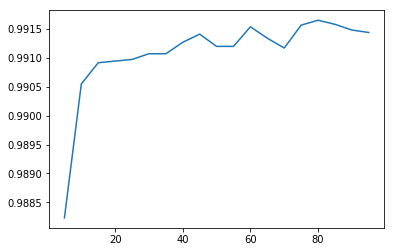

In [26]:
plt.plot(rfc_n_range, gs_rfc.cv_results_['mean_test_score'])

### Алгоритм AdaBoost

In [27]:
abc_n_range = np.array(range(5,100,5))
abc_tuned_parameters = [{'n_estimators': abc_n_range}]
abc_tuned_parameters

[{'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
         90, 95])}]

In [28]:
gs_abc = GridSearchCV(AdaBoostClassifier(), abc_tuned_parameters, cv=5,
                      scoring='accuracy')
gs_abc.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [29]:
gs_abc.best_params_

{'n_estimators': 95}

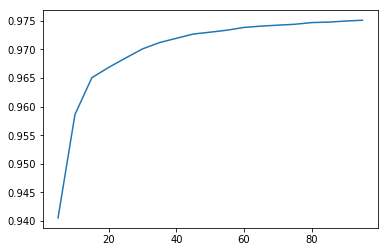

In [30]:
plt.plot(abc_n_range, gs_abc.cv_results_['mean_test_score'])

## Сравнение моделей после подбора гиперпараметров

### Случайный лес

In [0]:
rfc_optimized = RandomForestClassifier(n_estimators=gs_rfc.best_params_['n_estimators']).fit(X_train, Y_train)
predicted_rfc_opt = rfc_optimized.predict(X_test)

In [32]:
accuracy_score(Y_test, predicted_rfc_opt)

0.9913647138503217

In [33]:
balanced_accuracy_score(Y_test, predicted_rfc_opt)

0.9913478650025938

In [34]:
(precision_score(Y_test, predicted_rfc_opt, average='weighted'), 
 recall_score(Y_test, predicted_rfc_opt, average='weighted'))

(0.9913652465593787, 0.9913647138503217)

In [35]:
f1_score(Y_test, predicted_rfc_opt, average='weighted')

0.9913645979080572

### Алгоритм AdaBoost

In [0]:
abc_optimized = RandomForestClassifier(n_estimators=gs_abc.best_params_['n_estimators']).fit(X_train, Y_train)
predicted_abc_opt = abc_optimized.predict(X_test)

In [37]:
accuracy_score(Y_test, predicted_abc_opt)

0.991590472965346

In [38]:
balanced_accuracy_score(Y_test, predicted_abc_opt)

0.9915832077553736

In [39]:
(precision_score(Y_test, predicted_abc_opt, average='weighted'), 
 recall_score(Y_test, predicted_abc_opt, average='weighted'))

(0.9915904695464173, 0.991590472965346)

In [40]:
f1_score(Y_test, predicted_abc_opt, average='weighted')

0.9915904428152091

Подбор гиперпараметра n_estimators для моделей "Случайный лес" и "Алгоритм AdaBoost" позволил увеличить точность классификации.